In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

train_dir = 'train'
validation_dir = 'test'


train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,batch_size = 20,target_size = (150,150),class_mode = 'binary')     

validation_generator =  test_datagen.flow_from_directory( validation_dir,batch_size = 20,target_size = (150,150),class_mode = 'binary')



Found 560 images belonging to 2 classes.
Found 366 images belonging to 2 classes.


In [4]:

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (150,150,3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(128,activation= 'relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

W0913 22:26:27.138051 4578719168 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
 1/28 [>.............................] - ETA: 53s - loss: 0.6826 - acc: 0.6000

/usr/local/lib/python3.7/site-packages/PIL/Image.py:965: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


28/28 [==============================] - 69s 2s/step - loss: 0.7697 - acc: 0.6446 - val_loss: 0.4119 - val_acc: 0.8689
Epoch 2/15
28/28 [==============================] - 55s 2s/step - loss: 0.4085 - acc: 0.8286 - val_loss: 0.2747 - val_acc: 0.8907
Epoch 3/15
28/28 [==============================] - 55s 2s/step - loss: 0.3316 - acc: 0.8500 - val_loss: 0.4030 - val_acc: 0.8115
Epoch 4/15
28/28 [==============================] - 55s 2s/step - loss: 0.3493 - acc: 0.8625 - val_loss: 0.1922 - val_acc: 0.9344
Epoch 5/15
28/28 [==============================] - 55s 2s/step - loss: 0.2538 - acc: 0.8982 - val_loss: 0.1553 - val_acc: 0.9344
Epoch 6/15
28/28 [==============================] - 54s 2s/step - loss: 0.2631 - acc: 0.9000 - val_loss: 0.1298 - val_acc: 0.9536
Epoch 7/15
28/28 [==============================] - 55s 2s/step - loss: 0.2611 - acc: 0.8929 - val_loss: 0.1779 - val_acc: 0.9426
Epoch 8/15
28/28 [==============================] - 59s 2s/step - loss: 0.2209 - acc: 0.9125 - val_lo

Text(0.5, 1.0, 'Training and validation loss')

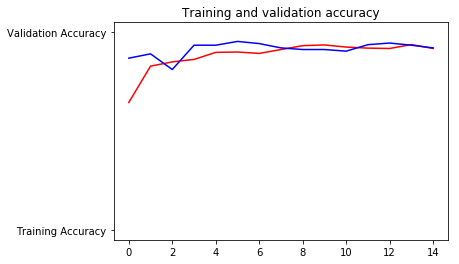

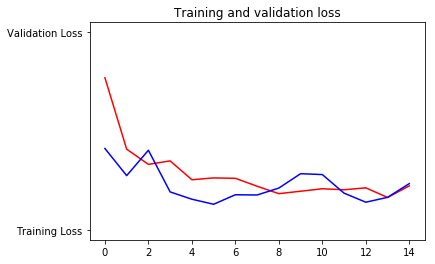

In [6]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [7]:
model.save('model.h5')